# `The Dataset Source : `

### https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [39]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler ,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_val_predict

## Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Ensemble Models (There is for Classification and Regression)
from sklearn.ensemble import VotingClassifier                                           ## One for each task
from sklearn.ensemble import BaggingClassifier                                          ## One for each task
from sklearn.ensemble import RandomForestClassifier                                     ## one for each task
from sklearn.ensemble import AdaBoostClassifier                                         ## one for each task

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# `Reading data :`

In [2]:
df=pd.read_csv('survey lung cancer.csv')
df.head(10)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [3]:
df.shape

(309, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.isnull().sum(axis=0)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<AxesSubplot:>

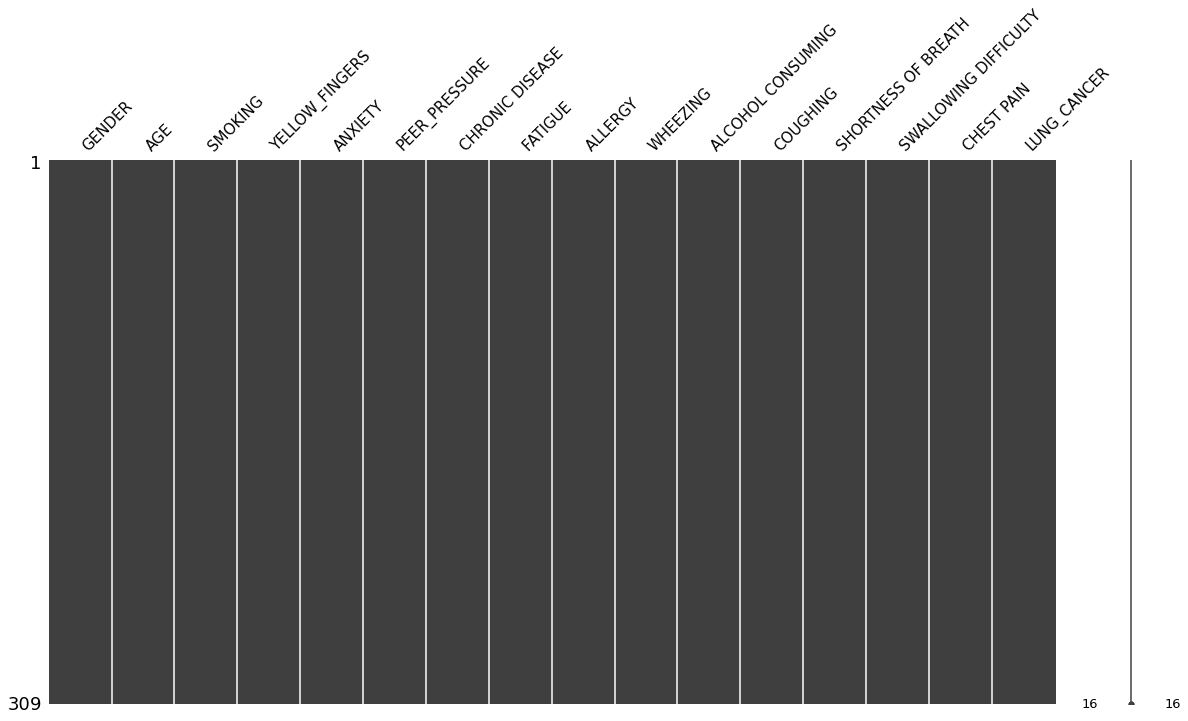

In [7]:
msno.matrix(df=df,figsize=(20, 10),fontsize=15, ) #check null values


## there is no null values

In [8]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

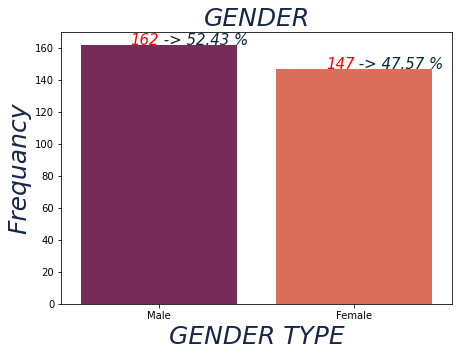

In [9]:
colors=['#182747','#DF5861']
plt.figure(figsize=(7,5))
sns.countplot(x='GENDER',data=df,palette='rocket')
plt.xlabel(fontsize=25,color='#182747',xlabel='GENDER TYPE',fontstyle='italic')
plt.xticks(ticks=np.arange(2),labels=["Male","Female"])
plt.ylabel(fontsize=25,color='#182747',ylabel='Frequancy',fontstyle='italic')
plt.title(label='GENDER',fontsize=25,color='#182747',fontstyle='italic')
counts=df.GENDER.value_counts()
for i in range(counts.shape[0]):
        plt.text(x=i,y=(counts[i]),s=f"{(counts[i])}",size=15,ha='right',color='red',fontstyle='italic')
for i in range(counts.shape[0]):
        plt.text(x=i,y=(counts[i]),s=f' -> {((counts[i]/df.shape[0])*100):.2f} %',size=15,ha='left',color='#06283D',fontstyle='italic')

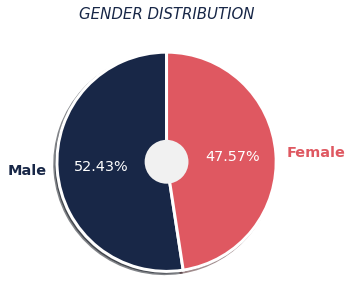

In [10]:
fig, ax = plt.subplots(figsize=(5, 7))
colors=['#182747','#DF5861']
patches, texts, pcts = ax.pie(
    df['GENDER'].value_counts(), labels=["Male","Female"],shadow=True, autopct='%.2f%%',colors=colors,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
centre_circle = plt.Circle((0,0),0.20,fc='#F1F1F1') 
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.title(label='GENDER DISTRIBUTION',fontsize=15,color='#182747',fontstyle='italic')

plt.tight_layout()

# age distribution

In [12]:
c,bins=np.histogram(df.AGE,bins=5)
np.min(df.AGE.values),c,bins


(21,
 array([  1,   9, 113, 156,  30], dtype=int64),
 array([21. , 34.2, 47.4, 60.6, 73.8, 87. ]))

In [13]:
labels=[]
for i in range(len(bins)-1):
    labels.append(f"{bins[i]:.2f} : {bins[i+1]:.2f}" )

labels

['21.00 : 34.20',
 '34.20 : 47.40',
 '47.40 : 60.60',
 '60.60 : 73.80',
 '73.80 : 87.00']

In [14]:
len(labels),len(c)

(5, 5)

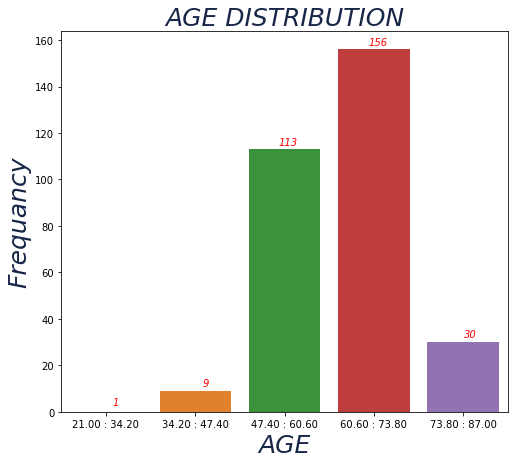

In [135]:
plt.figure(figsize=(8,7))
age_dist=pd.cut(df.AGE,bins=bins,labels=labels)
sns.countplot(age_dist);
plt.xlabel(fontsize=25,color='#182747',xlabel='AGE',fontstyle='italic')
plt.ylabel(fontsize=25,color='#182747',ylabel='Frequancy',fontstyle='italic')
plt.title(label='AGE DISTRIBUTION',fontsize=25,color='#182747',fontstyle='italic')
for i in range(len(c)):
        plt.text(x=i+.15,y=(c[i]+2),s=f"{(c[i])}",size=10,ha='right',color='red',fontstyle='italic')


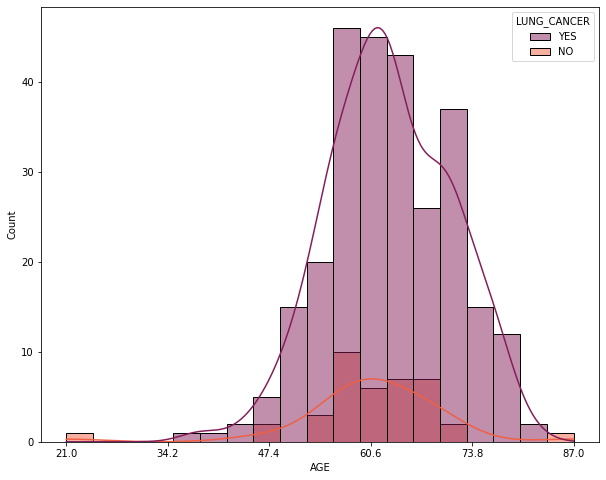

In [138]:
plt.figure(figsize=(10,8))
sns.histplot(df, x="AGE", kde=True,hue='LUNG_CANCER',palette="rocket")
plt.xticks(ticks=bins); 

In [16]:
num_col=[i for i in df.columns if df[i].dtype not in ['O']]
num_col

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

In [20]:
df.iloc[:,:-1]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2


## ` Split to Features and traget`

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
x.shape,y.shape

((309, 15), (309,))

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,shuffle=True,random_state=123)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((262, 15), (47, 15), (262,), (47,))

In [25]:
x_train[num_col]

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
125,53,1,2,2,2,2,2,2,1,1,2,2,1,1
128,58,2,2,2,2,1,2,1,1,1,2,2,2,1
184,72,2,1,1,1,1,2,2,2,2,2,2,1,2
30,57,2,2,1,1,1,1,1,1,1,1,2,1,1
19,61,1,1,1,1,2,2,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,61,2,2,2,2,2,2,1,1,1,1,2,2,1
83,81,1,1,1,2,2,1,2,1,2,2,2,1,1
17,57,2,2,2,2,2,1,1,1,2,1,1,2,2
230,78,1,2,1,2,2,2,1,2,1,1,2,2,2


## ` features preprocessing`
`

##  we used numerical pipline for imputing and scaling at the smame time

In [26]:
[i for i in x_train.columns if i not in num_col]

['GENDER']

In [27]:
# num pipline
num_pipline=Pipeline(steps=[('selector',DataFrameSelector(num_col))
                            ,('imputer',SimpleImputer(strategy='most_frequent'))
                            ,('scaler',StandardScaler())
                           ])                  #steps take list of tubles
# category pipline
categ_pipeline=Pipeline(steps=[('selector',DataFrameSelector(["GENDER"]))
                              ,('imputer',SimpleImputer(strategy="most_frequent"))
                              ,('ohe',OneHotEncoder())])

# total pipline
total_pipline=FeatureUnion(transformer_list=[("num_pipline",num_pipline)
                                             ,("categ_pipeline",categ_pipeline)])
total_pipline.fit(X=x_train)
x_train_final=total_pipline.transform(x_train)

x_test_final=total_pipline.transform(x_test)

In [28]:
y_train = (y_train=="YES")
y_test = (y_test=='YES')

In [29]:
y_train

125     True
128     True
184     True
30     False
19     False
       ...  
106     True
83      True
17      True
230     True
98      True
Name: LUNG_CANCER, Length: 262, dtype: bool

### `Build the Models`

### `1. Logistic Regression` 

In [188]:
## Logistic Regression
logit_clf = LogisticRegression(C=0.1)
logit_clf.fit(x_train_final, y_train)  ## Train

LogisticRegression(C=0.1)

In [191]:
## Using cross validation for prediction and evaluation
acc_scores_lgf = cross_val_score(estimator=logit_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')

print(f'Accuracy (Mean) scores using "Logistic Regression" -- {acc_scores_forest.mean():.3f}', )
## Prediction using cross validation
y_pred_lgf = cross_val_predict(estimator=logit_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Logistic Regression" -- 0.874


### `2. KNN`

In [192]:
## Using KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train_final, y_train)  ## Train

KNeighborsClassifier()

In [193]:
## Using cross validation for prediction and evaluation
acc_scores_knn = cross_val_score(estimator=knn_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')

print(f'Accuracy (Mean) scores using "KNN" -- {acc_scores_knn.mean():.3f}', )

## Prediction using cross validation
y_pred_knn = cross_val_predict(estimator=knn_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "KNN" -- 0.878


### `3. SVC`


In [56]:
## Using SVMs
svm_clf = SVC(kernel='linear', C=0.1, probability=True)
svm_clf.fit(x_train_final, y_train)  ## Train

SVC(C=0.1, kernel='linear', probability=True)

In [194]:
## Using cross validation for prediction and evaluation
acc_scores_svm = cross_val_score(estimator=svm_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')

print(f'Accuracy (Mean) scores using "SVM" -- {acc_scores_svm.mean():.3f}', )
## Prediction using cross validation
y_pred_svm = cross_val_predict(estimator=svm_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "SVM" -- 0.897


##  `4.Decison Trees`

In [59]:
## Decison Trees
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree_clf.fit(x_train_final, y_train)  ## Train

DecisionTreeClassifier(max_depth=2)

In [186]:
## Using cross validation for prediction and evaluation
acc_scores_tree = cross_val_score(estimator=tree_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')

print(f'Accuracy (Mean) scores using "Decision Trees" -- {acc_scores_tree.mean():.3f}', )
all_acc.append(acc)
## Prediction using cross validation
y_pred_tree = cross_val_predict(estimator=tree_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Decision Trees" -- 0.859


## `RANDOM FOREST`

In [196]:
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=3, max_leaf_nodes=25, 
                                    criterion='gini', max_features=1.0, max_samples=0.8)
forest_clf.fit(x_train_final, y_train)  ## train

RandomForestClassifier(max_depth=3, max_features=1.0, max_leaf_nodes=25,
                       max_samples=0.8, n_estimators=150)

In [197]:
## Using cross validation for prediction and evaluation

acc_scores_forest = cross_val_score(estimator=forest_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')

print(f'Accuracy (Mean) scores using "RandomForest" -- {acc_scores_forest.mean():.3f}', )


## Prediction using cross validation
y_pred_forest = cross_val_predict(estimator=forest_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "RandomForest" -- 0.870


## `FEATURES IMPORTANCE USING RANDOM FOREST`

In [198]:
d=dict(zip(num_col+["FEAMLE","MALE"], forest_clf.feature_importances_))
d

{'AGE': 0.10848967708094975,
 'SMOKING': 0.00851840919610817,
 'YELLOW_FINGERS': 0.09115516204184065,
 'ANXIETY': 0.020652431574594916,
 'PEER_PRESSURE': 0.04717553038374742,
 'CHRONIC DISEASE': 0.023949033333413878,
 'FATIGUE ': 0.1183562053263772,
 'ALLERGY ': 0.1964559513568612,
 'WHEEZING': 0.04867485493929754,
 'ALCOHOL CONSUMING': 0.10105091120885838,
 'COUGHING': 0.07652307379438239,
 'SHORTNESS OF BREATH': 0.01161463164661744,
 'SWALLOWING DIFFICULTY': 0.13327087481899091,
 'CHEST PAIN': 0.006914825663476973,
 'FEAMLE': 0.003911773758323098,
 'MALE': 0.0032866538761601735}

In [199]:
len(forest_clf.feature_importances_)

16

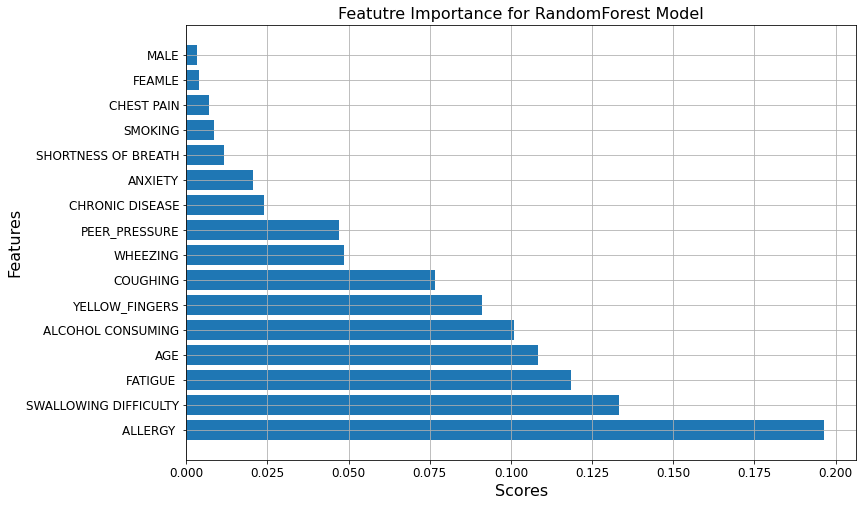

In [200]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': d.keys(), 'Scores': d.values()})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutre Importance for RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### `Voting Classifiers`

In [201]:
## Voting the above 4 models, firstly --------> try tuning the above models before voting
voting_clf = VotingClassifier(estimators=
                                    [
                                        ('logit', logit_clf),
                                        ('knn', knn_clf),
                                        ('svm', svm_clf),
                                        ('tree', tree_clf),
                                        ('rf',forest_clf)
                                    ], 
                              voting='soft'      ## --> Try using (hard), take your time playing with code.
                            )
## deal with the (voting_clf) as an ordinary model                
voting_clf.fit(x_train_final, y_train)  ## Train

VotingClassifier(estimators=[('logit', LogisticRegression(C=0.1)),
                             ('knn', KNeighborsClassifier()),
                             ('svm',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('tree', DecisionTreeClassifier(max_depth=2)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     max_features=1.0,
                                                     max_leaf_nodes=25,
                                                     max_samples=0.8,
                                                     n_estimators=150))],
                 voting='soft')

In [202]:
## Using cross validation for prediction and evaluation
acc_scores_voting = cross_val_score(estimator=voting_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Voting Classifier" -- {acc_scores_voting.mean():.3f}', )

## Prediction using cross validation
y_pred_voting = cross_val_predict(estimator=voting_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Voting Classifier" -- 0.889


### `Adaboost`

In [203]:
## using adaboost for DT as the base estimator
adaboost_clf = AdaBoostClassifier(
                                    base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=3), 
                                    n_estimators=100, 
                                    algorithm='SAMME.R', 
                                    learning_rate=0.5
                                  )
adaboost_clf.fit(x_train_final, y_train)  ## train

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=100)

In [204]:
## Using cross validation for prediction and evaluation
acc_scores_adaboost = cross_val_score(estimator=adaboost_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "Adaboost" -- {acc_scores_adaboost.mean():.3f}', )

## Prediction using cross validation
y_pred_adaboost = cross_val_predict(estimator=adaboost_clf, X=x_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')

Accuracy (Mean) scores using "Adaboost" -- 0.889


# 'Accuracy and Recall score for all'

In [205]:
## Getting all together 
models_outs = {logit_clf:y_pred_lgf, 
               knn_clf:y_pred_knn, 
               svm_clf:y_pred_svm, 
               tree_clf:y_pred_tree, 
               forest_clf:y_pred_forest,
               adaboost_clf:y_pred_adaboost,
               voting_clf:y_pred_voting
              }

for idx, clf in enumerate(models_outs.keys()):
    y_pred_each_clf = [*models_outs.values()][idx]   ## prediction for each model
    acc_score = accuracy_score(y_train, y_pred_each_clf)   ## accuracy
    print(clf.__class__.__name__, '-------', f'Accuracy score is : {acc_score:.4f}')

LogisticRegression ------- Accuracy score is : 0.8969
KNeighborsClassifier ------- Accuracy score is : 0.8779
SVC ------- Accuracy score is : 0.8969
DecisionTreeClassifier ------- Accuracy score is : 0.8588
RandomForestClassifier ------- Accuracy score is : 0.8779
AdaBoostClassifier ------- Accuracy score is : 0.8817
VotingClassifier ------- Accuracy score is : 0.8779


In [206]:
for idx, clf in enumerate(models_outs.keys()):
    y_pred_each_clf = [*models_outs.values()][idx]   ## prediction for each model
    recall = recall_score(y_train, y_pred_each_clf)   ## accuracy
    print(clf.__class__.__name__, '-------', f'Recall score is : {recall:.4f}')

LogisticRegression ------- Recall score is : 0.9781
KNeighborsClassifier ------- Recall score is : 0.9518
SVC ------- Recall score is : 0.9430
DecisionTreeClassifier ------- Recall score is : 0.9737
RandomForestClassifier ------- Recall score is : 0.9825
AdaBoostClassifier ------- Recall score is : 0.9518
VotingClassifier ------- Recall score is : 0.9605


confmat_sgd =>
 [[  6  28]
 [  4 224]]
------------------------------------------------------------


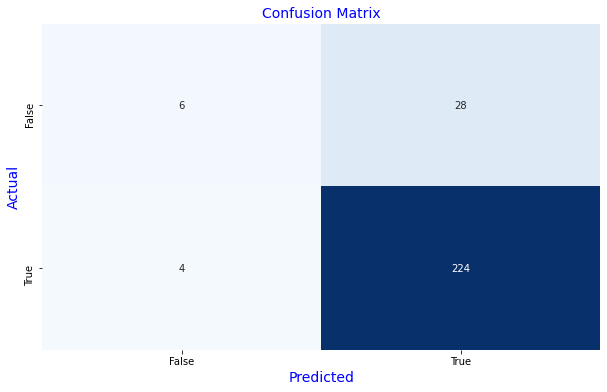

In [231]:
## confusion Matrix
confmat_rf = confusion_matrix(y_train, y_pred_forest)
print('confmat_sgd =>\n', confmat_sgd)

print('--'*30)


## Plotting as a HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [232]:
## Precision and Recall score
precison_score_rf = precision_score(y_train, y_pred_forest)
print('Precison Score using RF =>', precison_score_sgd)

print('---'*20)

recall_score_rf = recall_score(y_train, y_pred_forest)
print('Recall Score using RF =>', recall_score_sgd)

print('---'*20)

class_repo_rf = classification_report(y_train, y_pred_forest)
print('Classifcation Report using RF => \n', class_repo_sgd)

Precison Score using RF => 0.8888888888888888
------------------------------------------------------------
Recall Score using RF => 0.9824561403508771
------------------------------------------------------------
Classifcation Report using RF => 
               precision    recall  f1-score   support

       False       0.60      0.18      0.27        34
        True       0.89      0.98      0.93       228

    accuracy                           0.88       262
   macro avg       0.74      0.58      0.60       262
weighted avg       0.85      0.88      0.85       262



In [211]:
x_train.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

# `random test`

In [234]:
r_test=total_pipline.transform(pd.DataFrame([['M', 22, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2]],columns=x_train.columns)).toarray()

In [235]:
forest_clf.predict(r_test)

array([False])